# Data Load & Clean

## Imports & Functions

In [5]:
# Establish search path and import local utilities module
""" This includes: 
    get_data_path(), get_csv_file(data_path, file_name), 
    display_file_summary(data_frame, name=""), display_file_stats(data_frame, name="")
"""
import sys
sys.path.append("/Users/stuartgow/GitHub/Python_Snippets/Utilities")
import SGfilehandling as files

# Import typically used packages
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

In [6]:
def quick_plot(column):
    fig, ax = plt.subplots(figsize =(10, 5))
    counts = column.value_counts()
    bars = plt.barh(counts.index, counts.values, color='blue')
    ax.bar_label(bars, fmt='%d', padding=3) 
    plt.show()

def quick_horizontal(series, title=''):
    if not isinstance(series, list):
        series = [series]

    fig, axes = plt.subplots(nrows=1, ncols=len(series), figsize=(12,5), squeeze=False)
    fig.suptitle(title)
    axes = axes.flatten()
    for (nextSeries, nextAx) in zip(series, axes):
        counts = nextSeries.value_counts()
        bars = nextAx.barh(counts.index, counts.values, color='blue')
        nextAx.bar_label(bars, fmt='%d', padding=3) 

    plt.tight_layout()
    plt.show()

def quick_hist(series):
    if not isinstance(series, list):
        series = [series]

    fig, axes = plt.subplots(nrows=1, ncols=len(series), figsize=(12,5), squeeze=False)
    axes = axes.flatten()
    for (nextSeries, nextAx) in zip(series, axes):
        nextAx.hist(nextSeries, color='blue', width=5)

    plt.tight_layout()
    plt.show()

def quick_hist(series, bins=0):
    if not isinstance(series, list):
        series = [series]

    fig, axes = plt.subplots(nrows=1, ncols=len(series), figsize=(12,5), squeeze=False)
    axes = axes.flatten()
    for (nextSeries, nextAx) in zip(series, axes):
        if bins == 0:
            nextAx.hist(nextSeries, color='blue')
        else:
            nextAx.hist(nextSeries, color='blue', bins=bins)

    plt.tight_layout()
    plt.show()

def quick_spread(series, title):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(title)
    bars = ax0.hist(series, color='blue', bins=20)
    box = ax1.boxplot(series, patch_artist=True)
    for patch in box['boxes']:
        patch.set(facecolor='lightblue')
    plt.show()

## Data Load

In [7]:
# CSV File Data Load to a Pandas dataframe & Initial Examination
# The 'Data' folder one level above the project 
data_path = files.get_data_path()   
file_name="wallacecommunications.csv"

df = files.get_csv_file(data_path, file_name=file_name)

print(f'File Contents. {file_name}')
display(df.head())
files.display_file_summary(df, name=file_name)
files.display_file_stats(df, name=file_name)

File Contents. wallacecommunications.csv


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


File Details. wallacecommunications.csv


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
ID,50662,0,0,50644,80354425,2,int64,0,50662,0,0,0,0
town,50662,0,0,101,London,3241,object,50662,0,0,0,0,0
country,50662,0,0,5,UK,50657,object,50662,0,0,0,0,0
age,50662,0,0,76,32,2273,int64,0,50662,0,0,0,0
job,50662,0,0,12,management,10849,object,50662,0,0,0,0,0
married,50662,0,0,3,married,30045,object,50662,0,0,0,0,0
education,50662,0,0,4,secondary,25779,object,50662,0,0,0,0,0
arrears,50662,0,0,2,no,49794,object,50662,0,0,0,0,0
current_balance,50662,0,0,6928,0.0,3836,float64,0,0,50662,0,0,0
housing,50662,0,0,2,yes,27250,object,50662,0,0,0,0,0


File Stats For Numerics. wallacecommunications.csv


,count,mean,std,min,25%,50%,75%,max
ID,50662.00,55028712.75,25985959.78,10000726.00,32499637.25,55011272.00,77488092.25,99999515.00
age,50662.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50662.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
conn_tr,50662.00,3.01,1.41,1.00,2.00,3.00,4.00,5.00
last_contact_this_campaign_day,50662.00,15.77,8.35,1.00,8.00,16.00,21.00,31.00
this_campaign,50662.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00
days_since_last_contact_previous_campaign,50662.00,42.64,102.24,-1.00,-1.00,-1.00,-1.00,871.00
contacted_during_previous_campaign,50662.00,0.64,2.36,0.00,0.00,0.00,0.00,275.00


/var/folders/wd/rhzj_w8570g_y66t6j6mh4zw0000gn/T/ipykernel_13920/879174978.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=10, ax=ax, figure=fig, color='blue')


<function matplotlib.pyplot.show(close=None, block=None)>

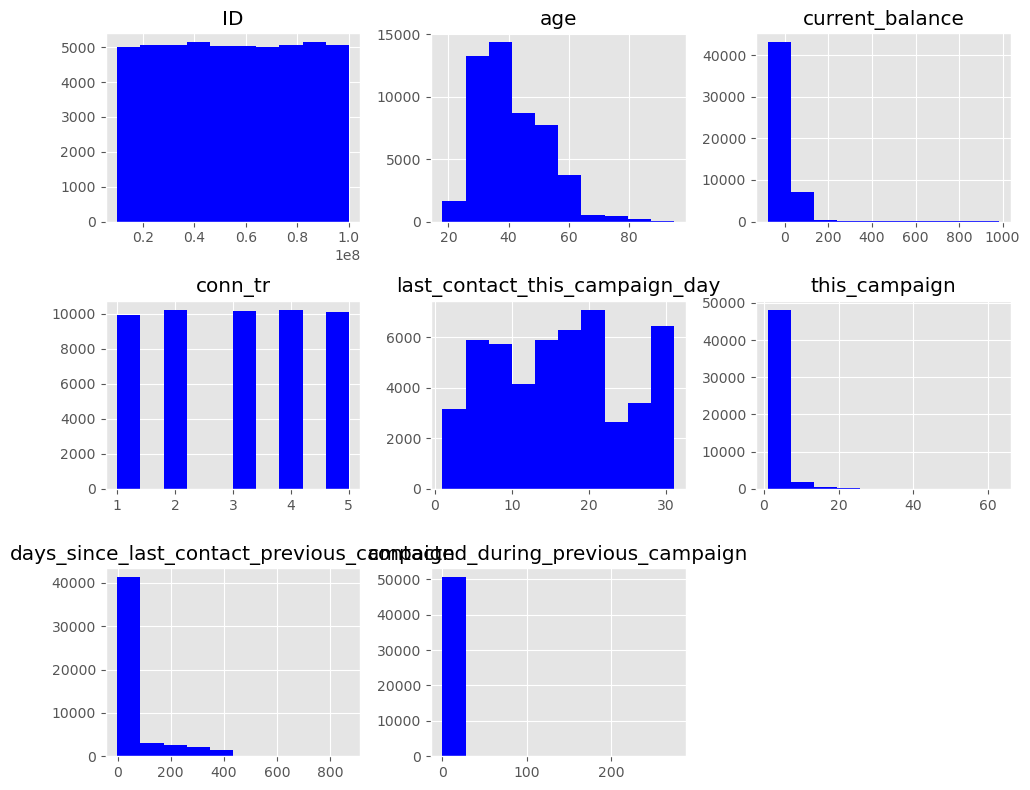

In [8]:
fig, ax = plt.subplots(figsize =(10, 8))
df.hist(bins=10, ax=ax, figure=fig, color='blue')
plt.tight_layout()
plt.show

## Data Cleaning & Transformation Stages



To Do 
- Match to the CRISP stages
- Review lecture notes for stages
- Review hands on ml for stages
- ?? state assumptions about before and after data split cleaning and processing
- ?? cite a reference re above decision
- ?? what to do to the target variable, eg SMOTE, Category encode?

Poster TO DO
- Make some reference to following CRISP, include a citation

Stages Summary
- Initial data exploration, potential issues
- Data cleaning - pre data split
- Data split - training/test and then k-fold cross-validation
- Data transformations - fit on training data, then apply to test

On Target

- ?? SMOTE
- ?? Encode


Apply Same to Testing Split


## Data Cleaning - Exploration


- See spreadsheet for actions taken, comments for each variable

Considerations:
- Missing, null - Just removing, not imputation
- Duplicates - Remove, resolve
- Inconsistencies, formatting eg categorical labeling, measurement scales
- Outliers - Just identify
- Flat and wide
- Imbalanced - Majority, minority classifications

In [9]:
# Copy to explore without changing the source data
customers_data_exploration = df.copy()


In [10]:
# ID - Identify duplicates
duplicated = customers_data_exploration[customers_data_exploration.duplicated(keep=False, subset=['ID'])]
print(f'Duplicates: {duplicated.shape[0]}')
display(duplicated.iloc[:, :7].sort_values(by='ID'))

Duplicates: 36


,ID,town,country,age,job,married,education
12236,15002168,Chelmsford,UK,55,technician,married,secondary
23589,15002168,Sutton Coldfield,UK,50,blue-collar,married,primary
33859,17445011,Worthing,UK,51,blue-collar,married,tertiary
48359,17445011,Woking,UK,33,technician,single,tertiary
26432,26742163,Southend-on-Sea,UK,43,management,married,tertiary
20623,26742163,Newcastle upon Tyne,UK,34,admin.,single,secondary
13028,29142129,Barnsley,UK,55,entrepreneur,married,tertiary
14451,29142129,Liverpool,UK,39,blue-collar,married,secondary
46365,31932493,Chester,UK,50,blue-collar,married,secondary
18339,31932493,Middlesbrough,UK,55,technician,married,secondary


In [11]:
# Town
towns_count = customers_data_exploration['town'].value_counts()
ranges = [0, 350, 500, 1200, float('inf')]
labels = ['0 to 350', '350 to 500', '500 to 1200', '1200+']
grouped_counts = pd.cut(towns_count, bins=ranges, labels=labels, include_lowest=True)
#range_counts = grouped_counts.groupby(grouped_counts).count()
range_counts = grouped_counts.value_counts()

print("Towns in each range:")
print(range_counts)

print('Over 1200')
print(towns_count[towns_count > 1200])


Towns in each range:
count
350 to 500     95
1200+           6
0 to 350        0
500 to 1200     0
Name: count, dtype: int64
Over 1200
town
London        3241
Birmingham    2383
Glasgow       1991
Bristol       1693
Liverpool     1591
Manchester    1244
Name: count, dtype: int64


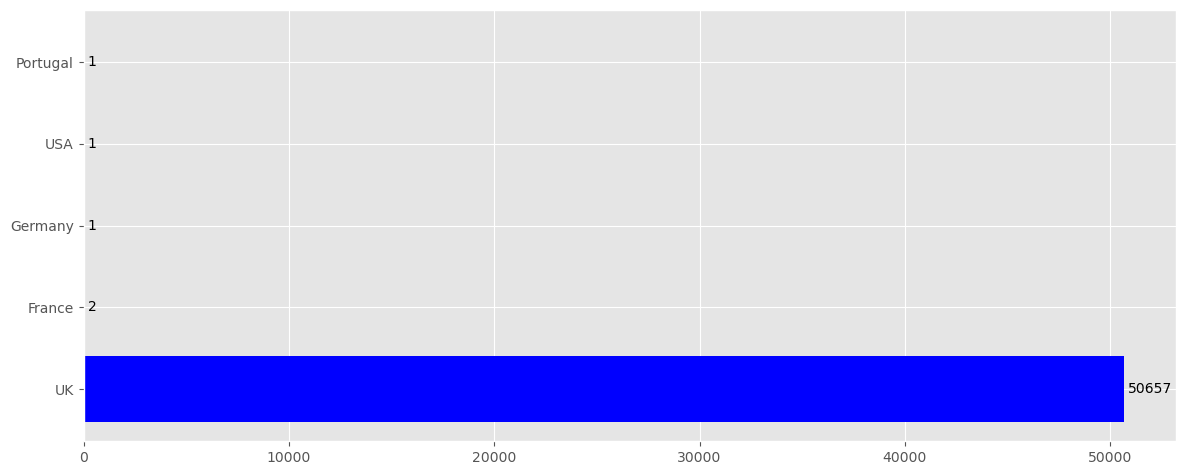

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
632,79806939,Basildon,France,39,management,married,tertiary,no,5.62,no,no,cellular,3,13,sep,2,-1,0,unknown,no
658,20895885,Aberdeen,France,49,technician,divorced,secondary,no,-2.36,yes,no,unknown,1,26,may,2,-1,0,unknown,no
747,14855363,Norwich,Germany,37,management,married,tertiary,no,6.30,no,no,cellular,2,30,apr,1,87,1,success,yes
1338,74486719,Sale,USA,26,technician,single,secondary,no,12.31,yes,no,cellular,2,3,jun,2,96,5,success,yes
6746,54594566,Birmingham,Portugal,50,housemaid,married,tertiary,no,52.60,yes,no,cellular,1,24,jul,2,-1,0,unknown,no


In [12]:
# Country - Some incorrect countries, change so All are UK ... bur drop anyway as all UK
quick_horizontal([customers_data_exploration['country']])
display(customers_data_exploration[customers_data_exploration['country'] != 'UK'])

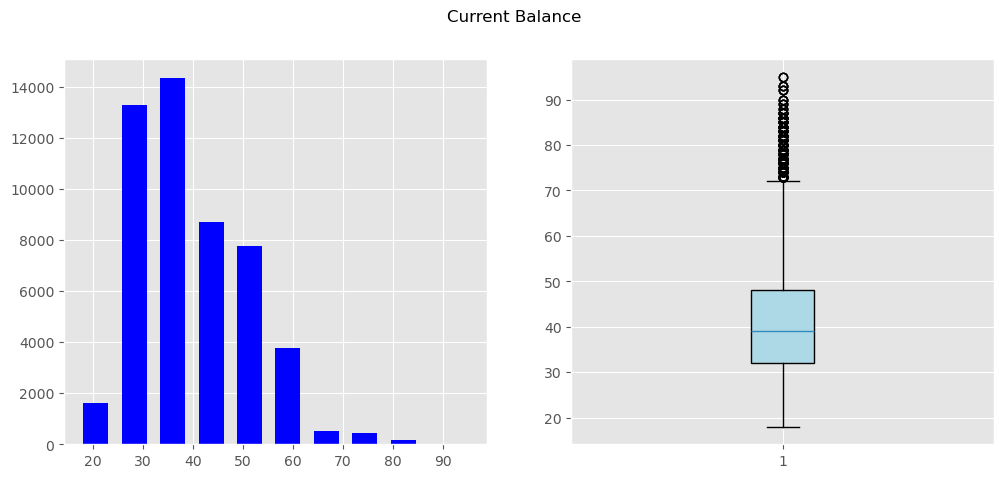

In [13]:
# Age
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Current Balance')

bars = ax0.hist(customers_data_exploration['age'], color='blue', width=5)
box = ax1.boxplot(customers_data_exploration['age'], patch_artist=True)
for patch in box['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

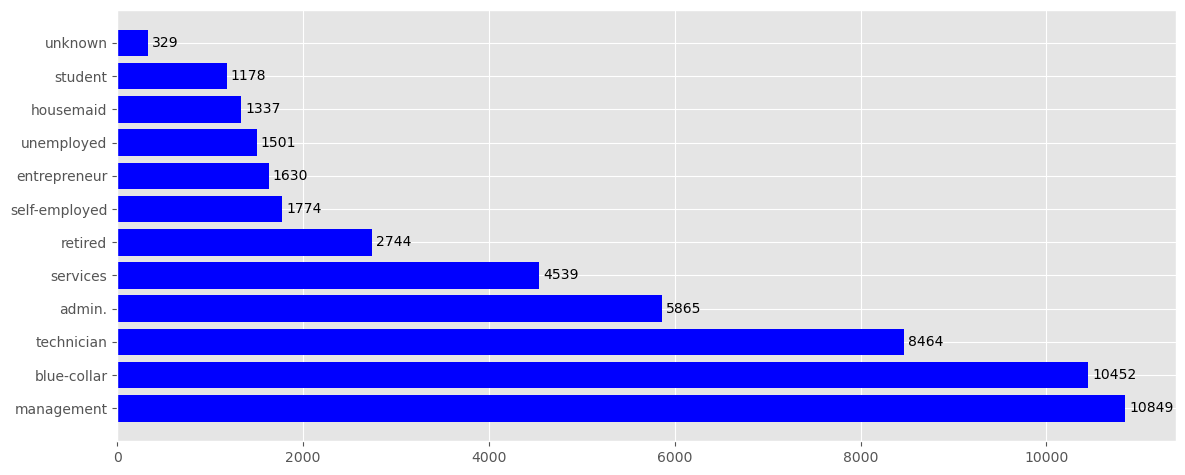

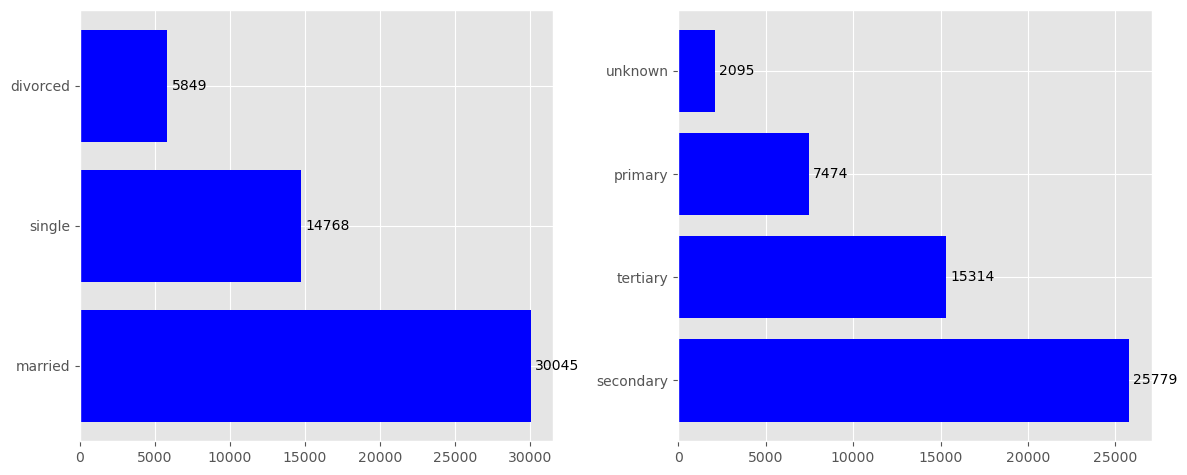

In [14]:
# Job, marriage, education
quick_horizontal([customers_data_exploration['job']])
quick_horizontal([customers_data_exploration['married'], customers_data_exploration['education']])

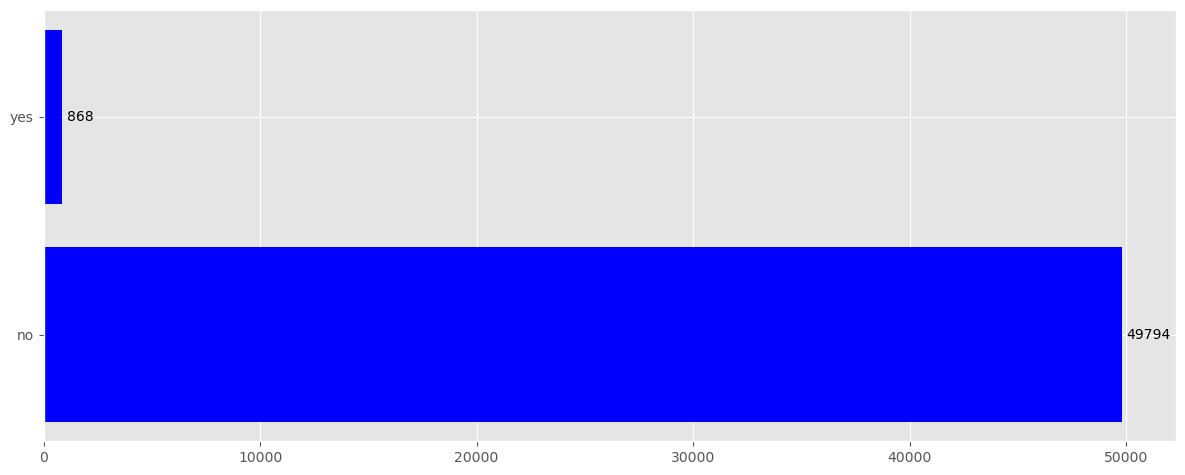

In [15]:
# Arrears
quick_horizontal([customers_data_exploration['arrears']])


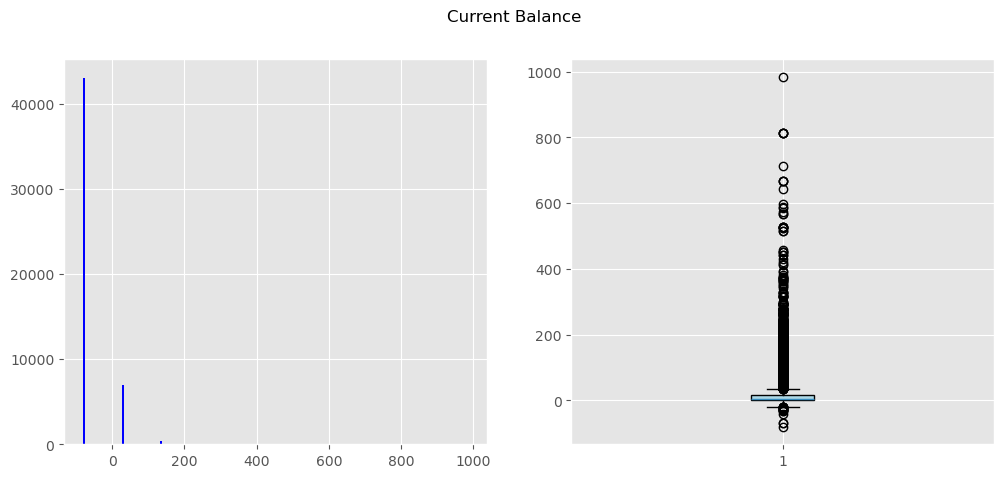

In [16]:
# Current Balance
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Current Balance')

bars = ax0.hist(customers_data_exploration['current_balance'], color='blue', width=5)
box = ax1.boxplot(customers_data_exploration['current_balance'], patch_artist=True)
for patch in box['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

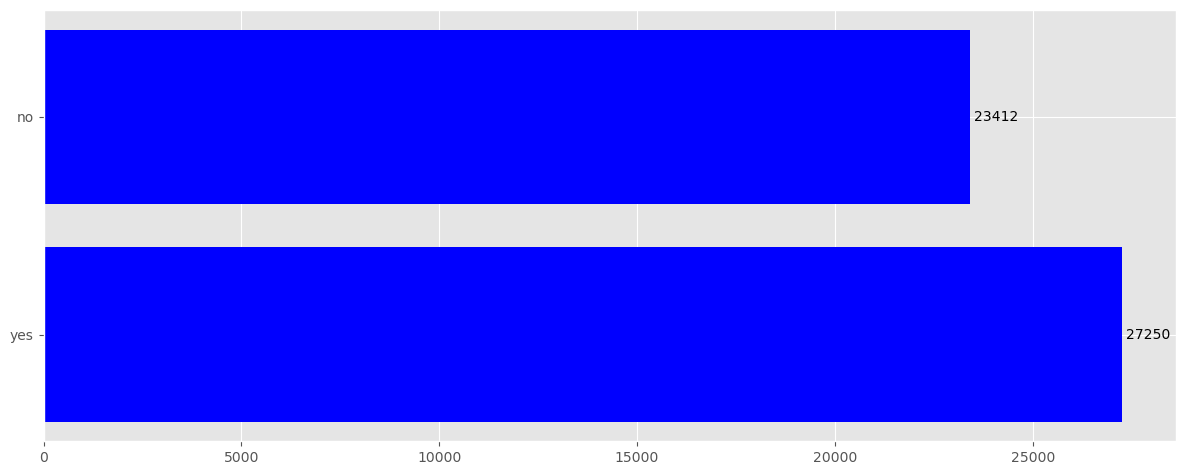

In [17]:
# Housing
quick_horizontal([customers_data_exploration['housing']])

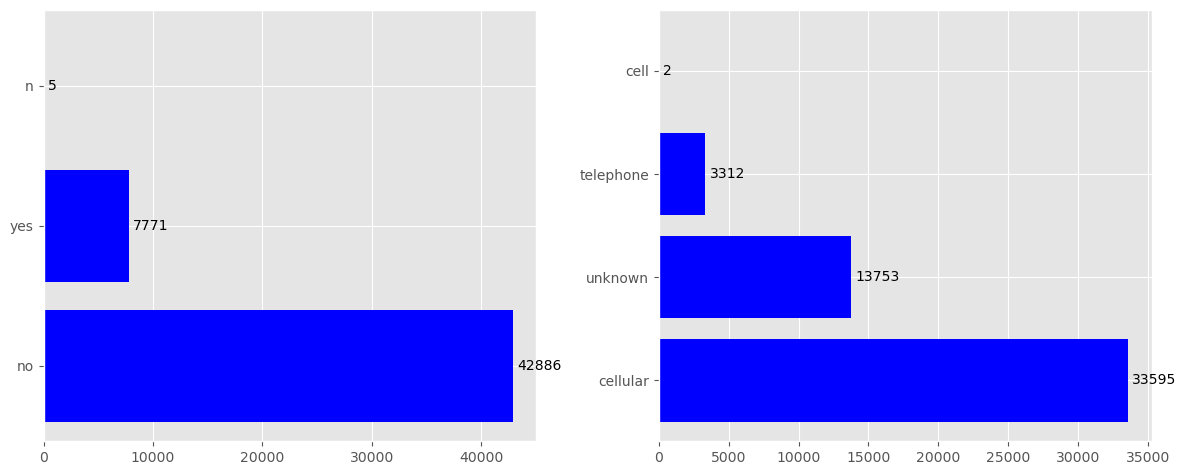

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
18,23771239,Milton Keynes,UK,32,management,married,tertiary,no,0.62,yes,n,telephone,2,13,nov,1,-1,0,unknown,no
971,56724125,Cheltenham,UK,34,technician,married,tertiary,no,1.97,no,n,cellular,2,20,aug,3,-1,0,unknown,yes
3106,40345744,Bristol,UK,30,management,single,tertiary,no,5.72,no,n,cellular,5,17,jun,3,183,2,success,yes
4782,96633301,Leicester,UK,60,retired,divorced,secondary,no,0.01,no,n,cellular,3,19,feb,1,184,1,success,yes
7548,86728502,Birmingham,UK,75,retired,married,primary,no,33.24,no,n,cellular,1,2,feb,1,-1,0,unknown,no


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
853,33899229,Southend-on-Sea,UK,26,management,single,tertiary,no,0.45,no,no,cell,4,10,jul,3,-1,0,unknown,yes
4827,76998373,Barnsley,UK,30,student,single,secondary,no,16.81,no,no,cell,5,7,dec,2,-1,0,unknown,yes


In [18]:
# Housing & Last Contact
quick_horizontal([customers_data_exploration['has_tv_package'], customers_data_exploration['last_contact']])
display(customers_data_exploration[customers_data_exploration['has_tv_package'] == 'n'])
display(customers_data_exploration[customers_data_exploration['last_contact'] == 'cell'])


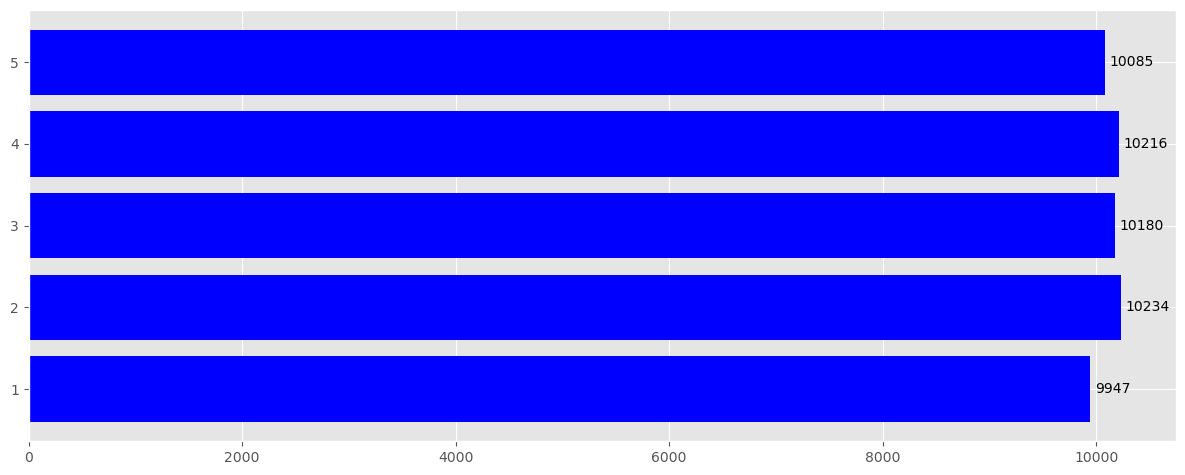

In [19]:
# Connection Type
quick_horizontal([customers_data_exploration['conn_tr']])

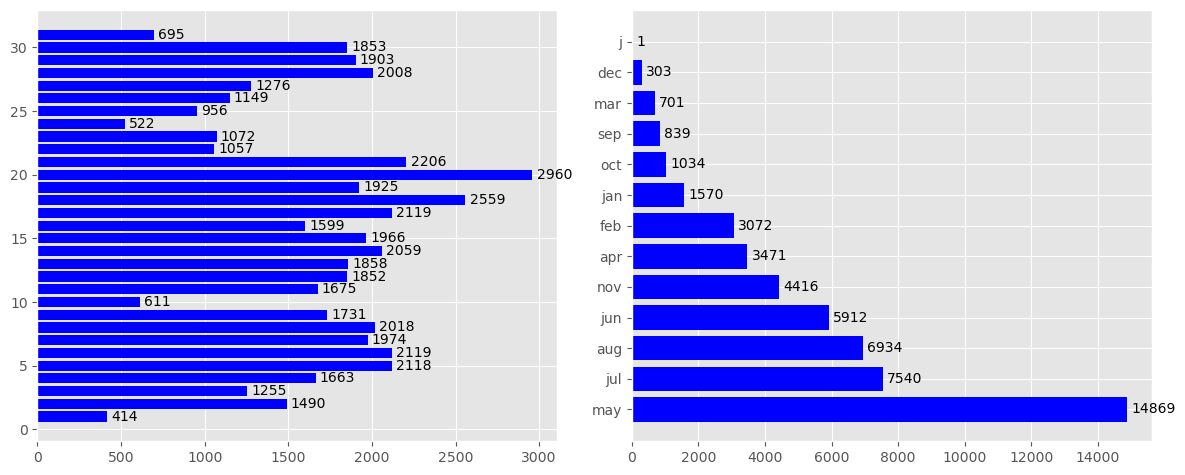

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
3513,56786748,Wigan,UK,32,technician,married,secondary,no,5.6,no,no,cellular,4,6,j,4,-1,0,unknown,yes


In [20]:
# Last Contact day and month
quick_horizontal([customers_data_exploration['last_contact_this_campaign_day'], customers_data_exploration['last_contact_this_campaign_month']])
display(customers_data_exploration[customers_data_exploration['last_contact_this_campaign_month'] == 'j'])



No Contacts: 0 Contacts <= 10: 49381 and over: 1281. So 2.53%


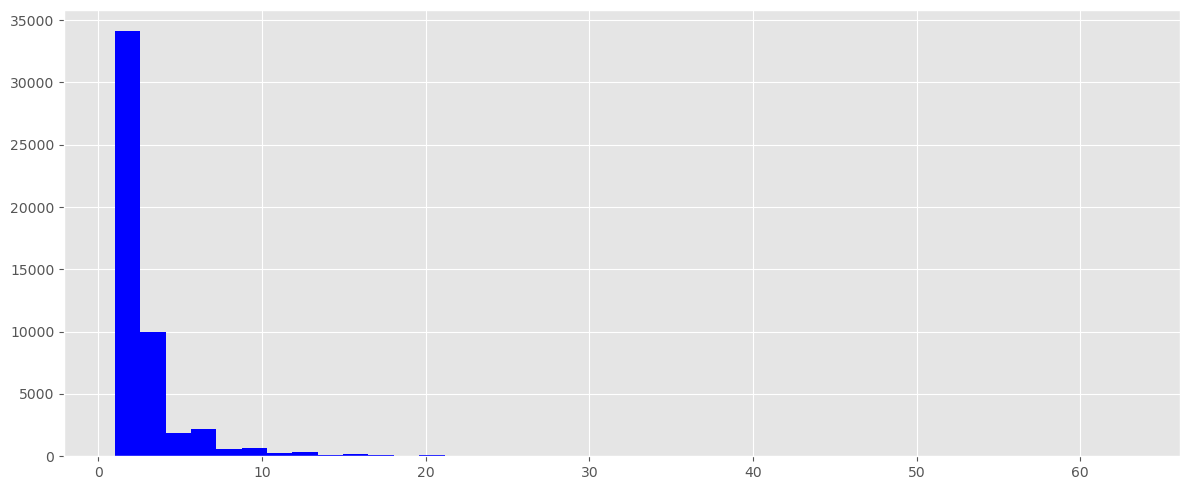

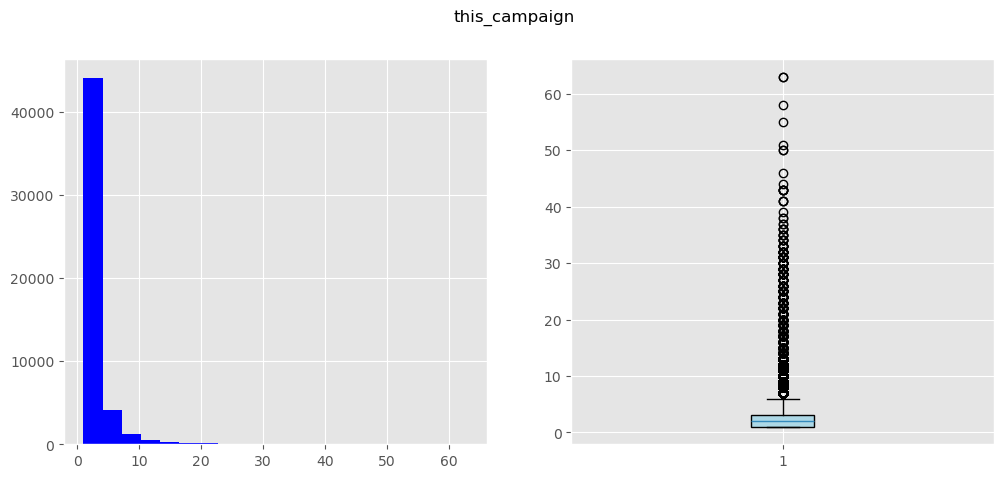

In [21]:
# Contacts this campaign
no_contacts = (customers_data_exploration['this_campaign'] <= 0).sum()
under_10 = (customers_data_exploration['this_campaign'] <= 10).sum()
over_10 = (customers_data_exploration['this_campaign'] > 10).sum()

print(f'No Contacts: {no_contacts} Contacts <= 10: {under_10} and over: {over_10}. So {100 * over_10/(under_10 + over_10):.2f}%')
quick_hist(customers_data_exploration['this_campaign'], bins=40)

quick_spread(customers_data_exploration['this_campaign'], title='this_campaign')


No Contacts: 40608 Contacts over 400: 347.


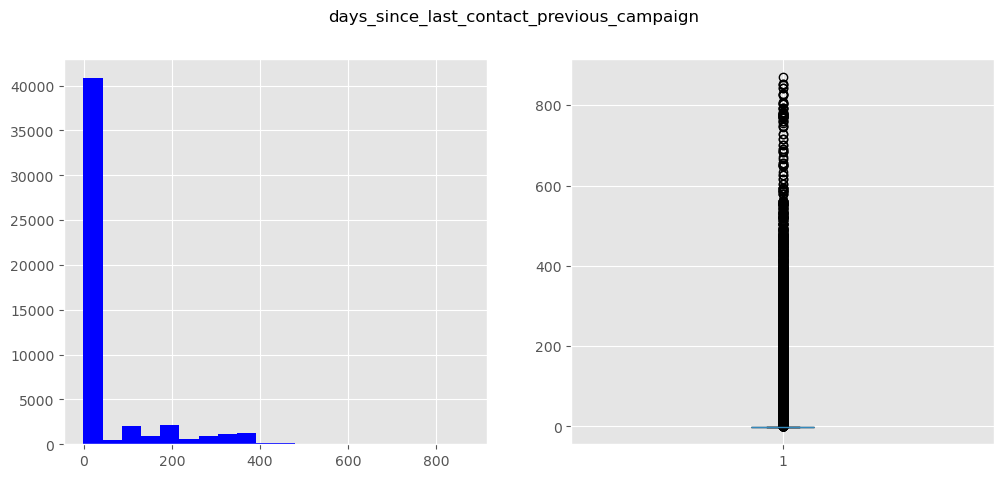

In [22]:
# Last Campaign metrics - Days since contact

no_contacts = (customers_data_exploration['days_since_last_contact_previous_campaign'] == -1).sum()
over_400 = (customers_data_exploration['days_since_last_contact_previous_campaign'] >= 400).sum()
print(f'No Contacts: {no_contacts} Contacts over 400: {over_400}.')

quick_spread(customers_data_exploration['days_since_last_contact_previous_campaign'], title='days_since_last_contact_previous_campaign')


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
18815,81248020,Bournemouth,UK,40,management,married,tertiary,no,5.43,yes,no,cellular,3,2,feb,2,262,275,other,no


No Contacts: 40608 Contacts <= 10: 9695 and over: 359. So 3.57%


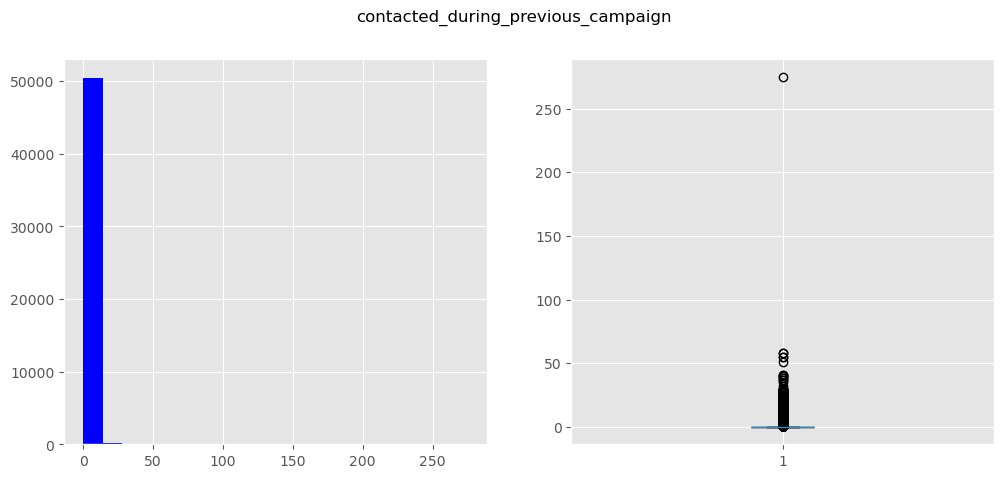

In [23]:
# Last Campaign metrics - Contacts made in previous campaign

display(customers_data_exploration[customers_data_exploration['contacted_during_previous_campaign'] > 60])
no_contacts = (customers_data_exploration['contacted_during_previous_campaign'] <= 0).sum()
under_10 = ((customers_data_exploration['contacted_during_previous_campaign'] > 0) & 
            (customers_data_exploration['contacted_during_previous_campaign'] <= 10)).sum()
over_10 = (customers_data_exploration['contacted_during_previous_campaign'] > 10).sum()

print(f'No Contacts: {no_contacts} Contacts <= 10: {under_10} and over: {over_10}. So {100 * over_10/(under_10 + over_10):.2f}%')
quick_spread(customers_data_exploration['contacted_during_previous_campaign'], title='contacted_during_previous_campaign')



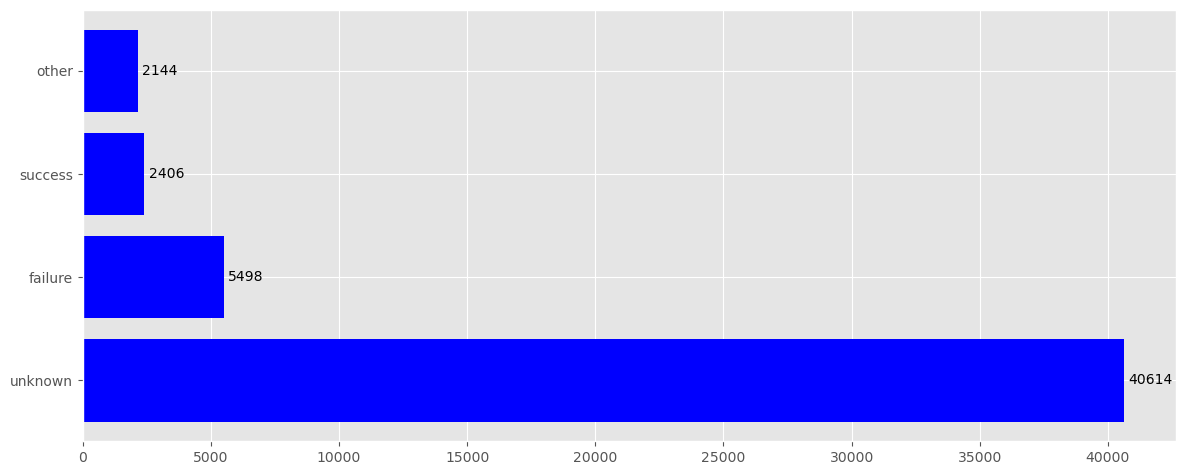

In [24]:
# Last Campaign metrics - Outcome previous campaign

quick_horizontal(customers_data_exploration['outcome_previous_campaign'])


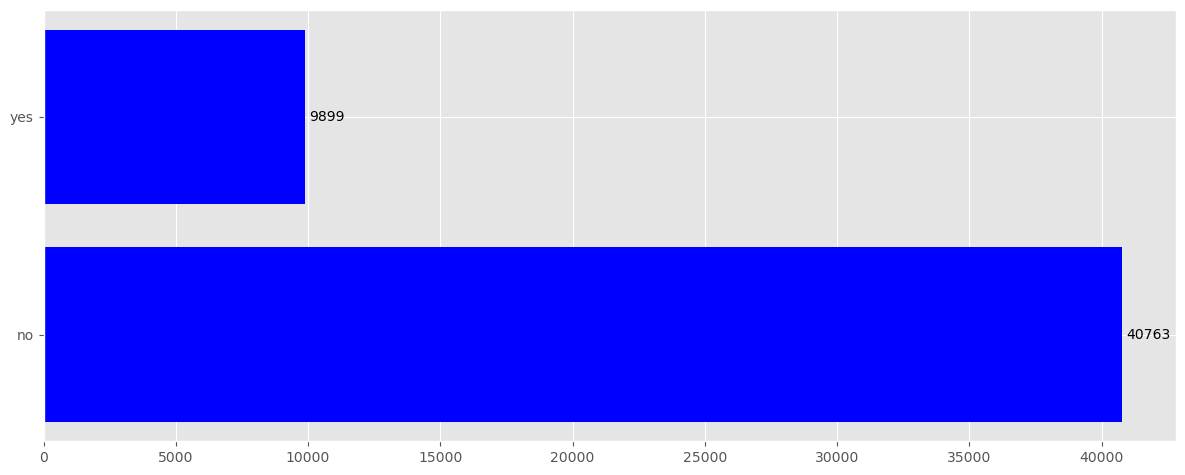

In [25]:
# New Contract this campaign
quick_horizontal(customers_data_exploration['new_contract_this_campaign'])

## Data Cleaning - Execution Pipeline


In [26]:
# Copy for data cleaning
customers_cleaned = df.copy()

# Before cleaning
print('Before Cleaning')
display(customers_cleaned.head())
files.display_file_summary(customers_cleaned)
files.display_file_stats(customers_cleaned)

Before Cleaning


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


File Details. 


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
ID,50662,0,0,50644,80354425,2,int64,0,50662,0,0,0,0
town,50662,0,0,101,London,3241,object,50662,0,0,0,0,0
country,50662,0,0,5,UK,50657,object,50662,0,0,0,0,0
age,50662,0,0,76,32,2273,int64,0,50662,0,0,0,0
job,50662,0,0,12,management,10849,object,50662,0,0,0,0,0
married,50662,0,0,3,married,30045,object,50662,0,0,0,0,0
education,50662,0,0,4,secondary,25779,object,50662,0,0,0,0,0
arrears,50662,0,0,2,no,49794,object,50662,0,0,0,0,0
current_balance,50662,0,0,6928,0.0,3836,float64,0,0,50662,0,0,0
housing,50662,0,0,2,yes,27250,object,50662,0,0,0,0,0


File Stats For Numerics. 


,count,mean,std,min,25%,50%,75%,max
ID,50662.00,55028712.75,25985959.78,10000726.00,32499637.25,55011272.00,77488092.25,99999515.00
age,50662.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50662.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
conn_tr,50662.00,3.01,1.41,1.00,2.00,3.00,4.00,5.00
last_contact_this_campaign_day,50662.00,15.77,8.35,1.00,8.00,16.00,21.00,31.00
this_campaign,50662.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00
days_since_last_contact_previous_campaign,50662.00,42.64,102.24,-1.00,-1.00,-1.00,-1.00,871.00
contacted_during_previous_campaign,50662.00,0.64,2.36,0.00,0.00,0.00,0.00,275.00


In [27]:
# Drop Rows
display(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'])
customers_cleaned.drop(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'].index, inplace=True)
display(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'])

display(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] == 275])
customers_cleaned.drop(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] == 275].index, inplace=True)
display(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] == 275])

# Drop Columns:
display(customers_cleaned.head())
drop_features = ['ID', 'country', 'conn_tr', 'last_contact_this_campaign_day',
                'days_since_last_contact_previous_campaign', 'contacted_during_previous_campaign', 'outcome_previous_campaign']
customers_cleaned.drop(drop_features, axis=1, inplace=True)

# Values
display(customers_cleaned[customers_cleaned['has_tv_package'] == 'n'])
customers_cleaned['has_tv_package'] = customers_cleaned['has_tv_package'].replace('n', 'no')
display(customers_cleaned[customers_cleaned['has_tv_package'] == 'n'])
display(customers_cleaned[customers_cleaned['last_contact'] == 'cell'])
customers_cleaned['last_contact'] = customers_cleaned['last_contact'].replace('cell', 'cellular')
display(customers_cleaned[customers_cleaned['last_contact'] == 'cell'])

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
3513,56786748,Wigan,UK,32,technician,married,secondary,no,5.6,no,no,cellular,4,6,j,4,-1,0,unknown,yes


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
18815,81248020,Bournemouth,UK,40,management,married,tertiary,no,5.43,yes,no,cellular,3,2,feb,2,262,275,other,no


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_month,this_campaign,new_contract_this_campaign
18,Milton Keynes,32,management,married,tertiary,no,0.62,yes,n,telephone,nov,1,no
971,Cheltenham,34,technician,married,tertiary,no,1.97,no,n,cellular,aug,3,yes
3106,Bristol,30,management,single,tertiary,no,5.72,no,n,cellular,jun,3,yes
4782,Leicester,60,retired,divorced,secondary,no,0.01,no,n,cellular,feb,1,yes
7548,Birmingham,75,retired,married,primary,no,33.24,no,n,cellular,feb,1,no


,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_month,this_campaign,new_contract_this_campaign


,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_month,this_campaign,new_contract_this_campaign
853,Southend-on-Sea,26,management,single,tertiary,no,0.45,no,no,cell,jul,3,yes
4827,Barnsley,30,student,single,secondary,no,16.81,no,no,cell,dec,2,yes


,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_month,this_campaign,new_contract_this_campaign


In [28]:
# After Cleaning
print('After Cleaning')
display(customers_cleaned.head())
files.display_file_summary(customers_cleaned)
files.display_file_stats(customers_cleaned)

After Cleaning


,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_month,this_campaign,new_contract_this_campaign
0,Bristol,39,management,married,tertiary,no,-1.90,no,yes,unknown,jun,8,yes
1,Basildon,53,housemaid,married,primary,no,3.62,no,no,cellular,jul,2,yes
2,Blackburn,79,retired,divorced,primary,no,27.87,no,no,telephone,jul,1,yes
3,Oldham,43,services,single,secondary,no,5.50,yes,no,cellular,may,2,no
4,Middlesbrough,35,technician,single,secondary,no,3.44,no,no,cellular,aug,16,yes


File Details. 


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
town,50660,0,0,101,London,3241,object,50660,0,0,0,0,0
age,50660,0,0,76,32,2272,int64,0,50660,0,0,0,0
job,50660,0,0,12,management,10848,object,50660,0,0,0,0,0
married,50660,0,0,3,married,30043,object,50660,0,0,0,0,0
education,50660,0,0,4,secondary,25778,object,50660,0,0,0,0,0
arrears,50660,0,0,2,no,49792,object,50660,0,0,0,0,0
current_balance,50660,0,0,6928,0.0,3836,float64,0,0,50660,0,0,0
housing,50660,0,0,2,yes,27249,object,50660,0,0,0,0,0
has_tv_package,50660,0,0,2,no,42889,object,50660,0,0,0,0,0
last_contact,50660,0,0,3,cellular,33595,object,50660,0,0,0,0,0


File Stats For Numerics. 


,count,mean,std,min,25%,50%,75%,max
age,50660.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50660.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
this_campaign,50660.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00


## Data Training / Test Split

In [29]:
# Separate features (X) and target variable (y)
targetName="new_contract_this_campaign"
featureNames=customers_cleaned.columns[customers_cleaned.columns != targetName]

X = customers_cleaned[featureNames]
y = customers_cleaned[targetName]

# Split of training and testing data, 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## temp

In [37]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler


categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns
X_train[categorical_features] = X_train[categorical_features].apply(LabelEncoder().fit_transform)


# Initialize selector
selector = RFECV(
    estimator=LogisticRegression(max_iter=500, solver='liblinear'),
    step=1,
    cv=5,
    scoring='accuracy'
)

# Fit to data
selector.fit(X_train, y_train)
X_selected = selector.transform(X_train)


# Get results
print("Optimal features:", selector.n_features_)
print("Feature rankings:", selector.ranking_)


# Get optimal feature names
optimal_features = X.columns[selector.support_]
print("Optimal features:", list(optimal_features))

# Optional: Feature rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': selector.ranking_
}).sort_values(by='Ranking')
print(feature_rankings)

Optimal features: 8
Feature rankings: [5 2 3 1 1 1 4 1 1 1 1 1]
Optimal features: ['married', 'education', 'arrears', 'housing', 'has_tv_package', 'last_contact', 'last_contact_this_campaign_month', 'this_campaign']
                             Feature  Ranking
3                            married        1
4                          education        1
5                            arrears        1
7                            housing        1
8                     has_tv_package        1
9                       last_contact        1
10  last_contact_this_campaign_month        1
11                     this_campaign        1
1                                age        2
2                                job        3
6                    current_balance        4
0                               town        5


Out of 12 components 3 explain 95.0%


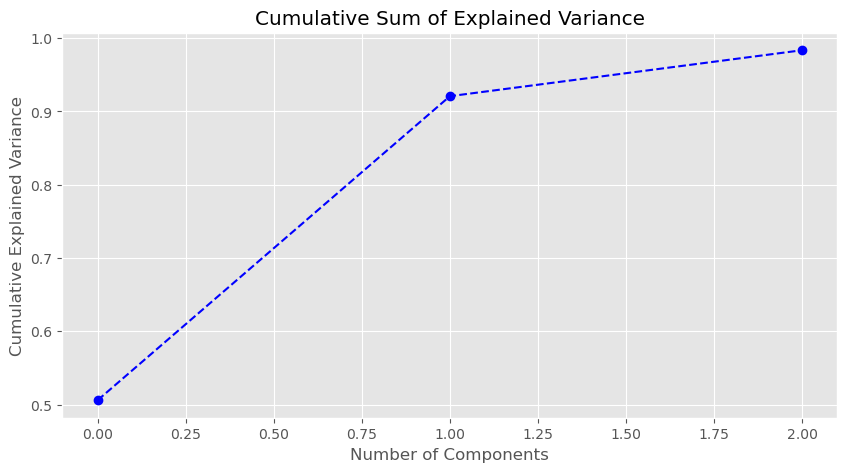

In [39]:
from sklearn.decomposition import PCA

proportion = 0.95
pca_explain = PCA(n_components=proportion)
pca_explain.fit(X_train)
print(f'Out of {X_train.shape[1]} components {pca_explain.n_components_} explain {100 * proportion}%')

pca = PCA()
pca.fit(X_train)
contributions_sum = np.cumsum(pca_explain.explained_variance_ratio_)

# Plot the cumulative sum of explained variance
plt.figure(figsize=(10, 5))
plt.plot(contributions_sum, marker='o', linestyle='--', color='b')
plt.title('Cumulative Sum of Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

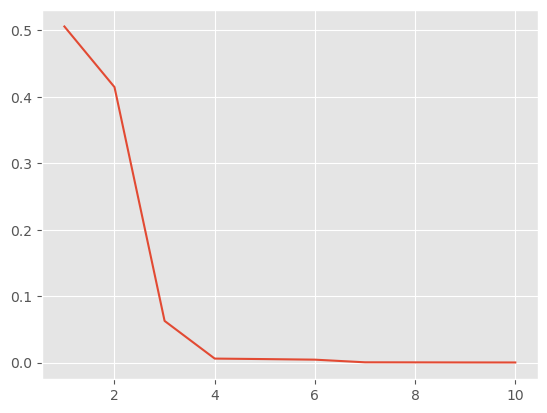

In [42]:
# PCA for a defined number of components

components = 10
pca2 = PCA(n_components=components)
X_train_PCA = pca2.fit(X_train)

explained_variance = pca2.explained_variance_ratio_
from numpy import arange
plt.plot(arange(1, components+1), explained_variance)
plt.show()

X_pca = pca2.transform(X_train)


In [48]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming X_train_dense is a pandas DataFrame with column names
feature_names = X_train.columns.tolist()

# Fit PCA with all components to get full variance ratios
pca = PCA(n_components=0.95).fit(X_train)

# Get feature contributions to components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# Show top 3 features per principal component
top_features_per_pc = {}
for pc in loadings.columns:
    top_features = loadings[pc].abs().nlargest(3).index.tolist()
    top_features_per_pc[pc] = top_features

print("Top features per principal component:")
pd.DataFrame(top_features_per_pc)


Top features per principal component:


,PC1,PC2,PC3
0,current_balance,town,age
1,town,current_balance,current_balance
2,age,job,married


## Data Transformations

- Missing, null - Imputation
- Outliers Removal
- Normalisation, scaling
- Categorical encoding
- Majority - ???
- Minority - SMOTE ... ?? but not for categorical

- ?? use minmaxscaler as data is non-gaussian?

from imblearn.over_sampling import SMOTENC`
obj = SMOTENC(categorical_features = [1,4])
ovsersampled_features, ovsersampled_target = obj.fit_sample(Features, Target)


from imblearn.over_sampling import SMOTENC
# Indices of categorical features (columns 1 and 2)
smote_nc = SMOTENC(categorical_features=[1, 2], random_state=42)
X_res, y_res = smote_nc.fit_resample(X, y)



In [30]:
# Encode & Scale The Data
# Use Column transformer to establish a repeatable setup for the data prep required

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Select the categorical and numerical features
#categorical_features = ['married', 'housing']
#numerical_features = ['age']
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

print(f'Numerics {len(numerical_features)} \n', numerical_features)
print(f'Categoricals {len(categorical_features)} \n', categorical_features)

# Create the transformations
transformations = [
    ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_features), 
    ('num', StandardScaler(), numerical_features)
    #('num', MinMaxScaler(), numerical_features)
    ]
col_transform = ColumnTransformer(transformers=transformations)
col_transform.fit(X_train)



Numerics 3 
 Index(['age', 'current_balance', 'this_campaign'], dtype='object')
Categoricals 9 
 Index(['town', 'job', 'married', 'education', 'arrears', 'housing',
       'has_tv_package', 'last_contact', 'last_contact_this_campaign_month'],
      dtype='object')


ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='infrequent_if_exist'),
                                 Index(['town', 'job', 'married', 'education', 'arrears', 'housing',
       'has_tv_package', 'last_contact', 'last_contact_this_campaign_month'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['age', 'current_balance', 'this_campaign'], dtype='object'))])

In [ ]:
# Perform the Transformation On All Data
# Target y_train, y_test is not transformed

X_train_encoded = col_transform.transform(X_train)
X_test_encoded = col_transform.transform(X_test)

display(f'X_Train Encoded: {X_train_encoded.shape}')
display(f'X_test_encoded: {X_test_encoded.shape}')
#display(col_transform.get_feature_names_out())

## Feature Projection - Using PCA

- Feature Selection/Projection ... PCA


### PCA Experiment

In [38]:
# PCA Import and convert dense array
from sklearn.decomposition import PCA

X_train_dense = X_train_encoded.toarray()
X_test_dense = X_test_encoded.toarray()

NameError: name 'X_train_encoded' is not defined

In [ ]:
# How many components needed to explain most of tha variation?

proportion = 0.95
pca_explain = PCA(n_components=proportion)
pca_explain.fit(X_train_dense)
print(f'Out of {X_test_encoded.shape[1]} components {pca_explain.n_components_} explain {100 * proportion}%')

pca = PCA()
pca.fit(X_train_dense)
contributions_sum = np.cumsum(pca_explain.explained_variance_ratio_)

# Plot the cumulative sum of explained variance
plt.figure(figsize=(10, 5))
plt.plot(contributions_sum, marker='o', linestyle='--', color='b')
plt.title('Cumulative Sum of Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# PCA for a defined number of components

components = 20
pca2 = PCA(n_components=components)
X_train_PCA = pca2.fit(X_train_dense)

explained_variance = pca2.explained_variance_ratio_
from numpy import arange
plt.plot(arange(1, components+1), explained_variance)
plt.show()


In [ ]:
# Prepare data using the PCA identified components

final_components = 20
pca = PCA(n_components=final_components)
pca.fit(X_train_dense)

X_train_PCA = pca.transform(X_train_dense)
X_test_PCA = pca.transform(X_test_dense)

print(f'X_Train Encoded: {X_train_encoded.shape}')
print(f'X_test_encoded: {X_test_encoded.shape}')
print(f'X_Train_pca: {X_train_PCA.shape}')
print(f'X_test_pca: {X_test_PCA.shape}')

## ??
- see page 248 HOML, create a pipeline and gridsearch to look at PCA components, and hyperparameters to find best scoring

## 

SMOTENC (SMOTE for Nominal and Continuous) is designed for datasets with both categorical and continuous features.

- SMOTE
- Then Encode categorical


In [ ]:
from imblearn.over_sampling import SMOTENC
# Specify indices of categorical features (e.g., first 3 columns)
smote_nc = SMOTENC(categorical_features=[0, 1, 2], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)


## Wrapper Method - Selection

- Hyperparameters
- PCA components

## Feature Selection

?? PCA after transformations

## Save Cleaned Data for Later Model Training


In [ ]:
import pickle

container = (X_train_encoded, X_test_encoded, y_train, y_test)
with open('xy_data.pickle', 'wb') as file:
    pickle.dump(container, file)